# Machine Learning Project Report

The dataset for this competition is a synthetic dataset based off of the Dissolved oxygen prediction in river water dataset. 

# Data Loading and Preprocessing:

### 1.1 Importing Libraries
The necessary libraries, including pandas for data manipulation, scikit-learn for machine learning tools, and matplotlib and seaborn for visualization, are imported.

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Loading Dataset
The dataset, named "sample_submission.csv," is loaded using the pandas read_csv function.

In [2]:
# Load the dataset
df = pd.read_csv("sample_submission.csv")

In [3]:
# Display the first few rows of the dataset
pd.DataFrame(df).head()

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,7.500,9.00,9.545,9.265,8.110,8.43,7.15,0.180,...,4.95,1.730,1.800,4.800,3.15,10.665,10.465,16.645,5.75,10.37
1,1,9.10,13.533,40.90,8.770,9.265,6.015,10.07,7.15,1.107,...,20.05,9.530,7.695,4.550,6.95,2.040,5.200,5.725,2.95,2.23
2,2,8.21,3.710,5.42,8.770,9.265,4.550,10.07,7.15,0.020,...,4.58,3.025,3.960,4.935,4.95,4.725,6.075,6.750,3.50,3.17
3,3,8.39,8.700,8.10,9.500,9.200,5.200,8.67,6.67,0.280,...,8.45,2.070,1.730,6.300,4.70,3.500,6.200,8.670,2.90,7.37
4,4,8.07,8.050,8.65,7.960,9.265,3.290,10.07,7.15,0.360,...,2.02,1.730,0.760,4.800,4.97,3.950,2.800,8.400,3.50,3.90


### 1.3 Exploratory Data Analysis (EDA)
A preliminary analysis of the dataset is conducted through EDA, including visualizing the distribution of the target variable, dissolved oxygen, using histograms and kernel density plots.

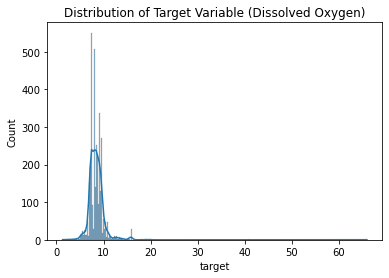

In [4]:
# Exploratory Data Analysis (EDA)
# Visualize the distribution of the target variable
sns.histplot(df['target'], kde=True)
plt.title('Distribution of Target Variable (Dissolved Oxygen)')
plt.show()

### 1.4 Handling Missing Values
Missing values in the dataset are identified and addressed using the SimpleImputer from scikit-learn. The missing values are imputed with the mean of each column.

In [6]:
# Handle Missing Values
# Check for missing values
print("Missing values before imputation:")
print(df.isnull().sum())

Missing values before imputation:
id        0
target    0
O2_1      0
O2_2      0
O2_3      0
O2_4      0
O2_5      0
O2_6      0
O2_7      0
NH4_1     0
NH4_2     0
NH4_3     0
NH4_4     0
NH4_5     0
NH4_6     0
NH4_7     0
NO2_1     0
NO2_2     0
NO2_3     0
NO2_4     0
NO2_5     0
NO2_6     0
NO2_7     0
NO3_1     0
NO3_2     0
NO3_3     0
NO3_4     0
NO3_5     0
NO3_6     0
NO3_7     0
BOD5_1    0
BOD5_2    0
BOD5_3    0
BOD5_4    0
BOD5_5    0
BOD5_6    0
BOD5_7    0
dtype: int64


In [7]:
# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Feature Engineering

### 2.1 Calculating Mean and Standard Deviation
Mean and standard deviation are calculated for groups of variables related to O2, NH4, NO2, NO3, and BOD5. These calculations provide additional features that capture the central tendency and variability of the data.

### 2.2 Summation of Variables
The total sum of O2, NH4, NO2, NO3, and BOD5 is computed, creating new features that represent the cumulative values of these variables.

In [8]:
# Feature Engineering
# 1. Calculate the mean and standard deviation for each group of O2, NH4, NO2, NO3, and BOD5
df_imputed['O2_mean'] = df_imputed[['O2_1', 'O2_2', 'O2_3', 'O2_4', 'O2_5', 'O2_6', 'O2_7']].mean(axis=1)
df_imputed['O2_std'] = df_imputed[['O2_1', 'O2_2', 'O2_3', 'O2_4', 'O2_5', 'O2_6', 'O2_7']].std(axis=1)

df_imputed['NH4_mean'] = df_imputed[['NH4_1', 'NH4_2', 'NH4_3', 'NH4_4', 'NH4_5', 'NH4_6', 'NH4_7']].mean(axis=1)
df_imputed['NH4_std'] = df_imputed[['NH4_1', 'NH4_2', 'NH4_3', 'NH4_4', 'NH4_5', 'NH4_6', 'NH4_7']].std(axis=1)

df_imputed['NO2_mean'] = df_imputed[['NO2_1', 'NO2_2', 'NO2_3', 'NO2_4', 'NO2_5', 'NO2_6', 'NO2_7']].mean(axis=1)
df_imputed['NO2_std'] = df_imputed[['NO2_1', 'NO2_2', 'NO2_3', 'NO2_4', 'NO2_5', 'NO2_6', 'NO2_7']].std(axis=1)

df_imputed['NO3_mean'] = df_imputed[['NO3_1', 'NO3_2', 'NO3_3', 'NO3_4', 'NO3_5', 'NO3_6', 'NO3_7']].mean(axis=1)
df_imputed['NO3_std'] = df_imputed[['NO3_1', 'NO3_2', 'NO3_3', 'NO3_4', 'NO3_5', 'NO3_6', 'NO3_7']].std(axis=1)

df_imputed['BOD5_mean'] = df_imputed[['BOD5_1', 'BOD5_2', 'BOD5_3', 'BOD5_4', 'BOD5_5', 'BOD5_6', 'BOD5_7']].mean(axis=1)
df_imputed['BOD5_std'] = df_imputed[['BOD5_1', 'BOD5_2', 'BOD5_3', 'BOD5_4', 'BOD5_5', 'BOD5_6', 'BOD5_7']].std(axis=1)

# 2. Calculate the total sum of O2, NH4, NO2, NO3, and BOD5
df_imputed['O2_sum'] = df_imputed[['O2_1', 'O2_2', 'O2_3', 'O2_4', 'O2_5', 'O2_6', 'O2_7']].sum(axis=1)
df_imputed['NH4_sum'] = df_imputed[['NH4_1', 'NH4_2', 'NH4_3', 'NH4_4', 'NH4_5', 'NH4_6', 'NH4_7']].sum(axis=1)
df_imputed['NO2_sum'] = df_imputed[['NO2_1', 'NO2_2', 'NO2_3', 'NO2_4', 'NO2_5', 'NO2_6', 'NO2_7']].sum(axis=1)
df_imputed['NO3_sum'] = df_imputed[['NO3_1', 'NO3_2', 'NO3_3', 'NO3_4', 'NO3_5', 'NO3_6', 'NO3_7']].sum(axis=1)
df_imputed['BOD5_sum'] = df_imputed[['BOD5_1', 'BOD5_2', 'BOD5_3', 'BOD5_4', 'BOD5_5', 'BOD5_6', 'BOD5_7']].sum(axis=1)

### 2.3 Removing Redundant Features
Unnecessary or redundant features are removed to simplify the dataset and enhance model efficiency.

In [9]:
# Remove Redundant or Irrelevant Features
# Drop unnecessary columns
columns_to_drop = ['id']  # Add more columns if needed
df_imputed = df_imputed.drop(columns=columns_to_drop)

# Outlier Detection and Handling:

### 3.1 Visualizing Outliers
Outliers in the dataset are visualized using box plots, allowing for a quick identification of extreme values.

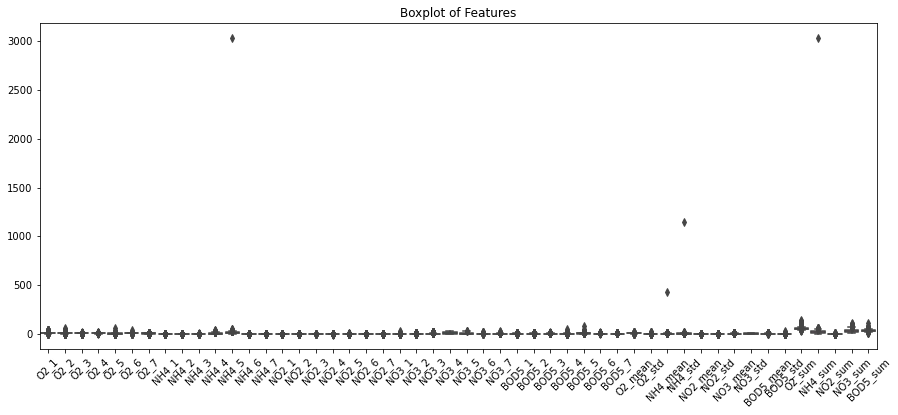

In [10]:
# Visualize outliers using box plots
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_imputed.drop(columns=['target']))
plt.title('Boxplot of Features')
plt.xticks(rotation=45)
plt.show()

### 3.2 Z-Score Method
The Z-score method is employed to detect outliers, and data points beyond a certain threshold are considered outliers. These outliers are subsequently removed from the dataset.

In [11]:
# Use Z-score to detect and remove outliers
from scipy.stats import zscore
import numpy as np
z_scores = zscore(df_imputed.drop(columns=['target']))
threshold = 3
outliers = (np.abs(z_scores) > threshold).any(axis=1)
df_no_outliers = df_imputed[~outliers]

In [14]:
# Convert the target variable into categories (classification)
# Assuming we want to create two classes: 'Low' and 'High' dissolved oxygen levels
df_no_outliers['target_category'] = pd.cut(df_no_outliers['target'], bins=[-float('inf'), df_no_outliers['target'].mean(), float('inf')], labels=['Low', 'High'])

# Separate features (X) and the new categorical target variable (y)
X_no_outliers = df_no_outliers.drop(columns=['target', 'target_category'])
y_no_outliers = df_no_outliers['target_category']

# Balancing the Dataset:

### 4.1 SMOTE for Balancing
The Synthetic Minority Over-sampling Technique (SMOTE) is implemented to address class imbalance, ensuring a more balanced distribution of target categories.

In [15]:
# Apply SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_no_outliers, y_no_outliers)

In [16]:
# Create a DataFrame with the resampled data
df_balanced_no_outliers = pd.DataFrame(X_resampled, columns=X_no_outliers.columns)
df_balanced_no_outliers['target'] = y_resampled

# Correlation Analysis:

### 5.1 Correlation Matrix
A correlation matrix is calculated and visualized to understand the relationships between different features. This step aids in identifying potential multicollinearity.

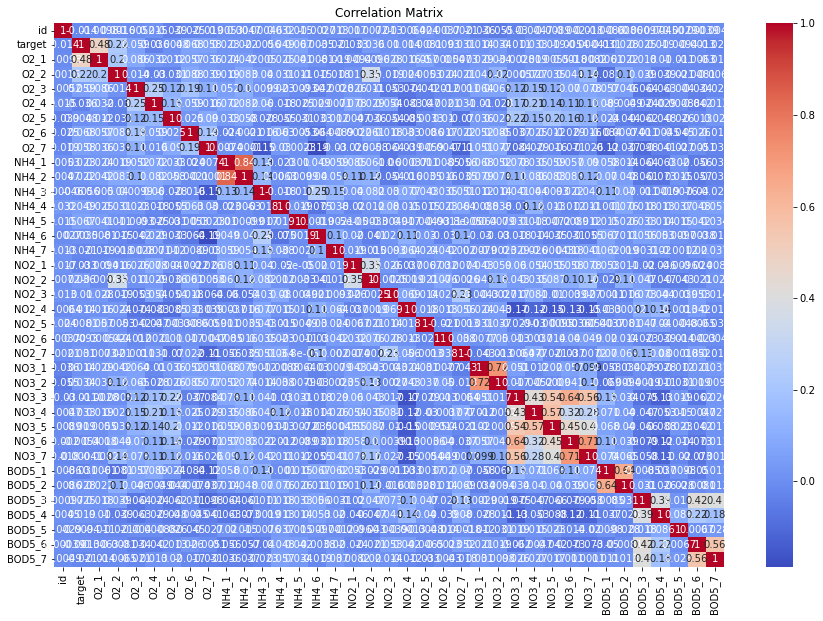

In [17]:
# Calculate and visualize the correlation matrix
correlation_matrix = df_imputed.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Model Training and Hyperparameter Tuning:

### 6.1 GridSearchCV for Hyperparameter Tuning
GridSearchCV is employed to perform hyperparameter tuning for the Random Forest model. This involves testing various combinations of hyperparameters to find the optimal configuration.

In [20]:
# Perform In-Depth Feature Engineering and Selection
# (Add more sophisticated feature engineering steps based on domain knowledge)

# Optimize Hyperparameters and Train the Random Forest Model
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

### 6.2 Random Forest Model
A Random Forest model is trained on the preprocessed and balanced dataset.

In [21]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

### 6.3 Best Model Initialization
The best hyperparameters obtained from GridSearchCV are used to initialize a Random Forest model.

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Make a copy of the DataFrame to avoid SettingWithCopyWarning
df_no_outliers_copy = df_no_outliers.copy()

# Convert the target variable into categories (classification)
df_no_outliers_copy['target_category'] = pd.cut(df_no_outliers_copy['target'], bins=[-float('inf'), df_no_outliers_copy['target'].mean(), float('inf')], labels=['Low', 'High'])

# Separate features (X) and the new categorical target variable (y)
X_no_outliers = df_no_outliers_copy.drop(columns=['target', 'target_category'])
y_no_outliers = df_no_outliers_copy['target_category']

# Apply Label Encoding on the categorical target variable
label_encoder = LabelEncoder()
y_no_outliers_encoded = label_encoder.fit_transform(y_no_outliers)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_no_outliers, y_no_outliers_encoded)

# Define the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid (replace ... with actual values)
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Initialize the Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(random_state=42, **best_params)


# Model Evaluation:

### 7.1 Making Predictions
The trained Random Forest model is used to make predictions on the validation set.

In [24]:
# Train the model on the balanced and feature-engineered dataset
best_rf_model.fit(X_resampled, y_resampled)

# Evaluate the Model
# Split the dataset into features (X) and target variable (y)
X_valid = df_balanced_no_outliers.drop(columns=['target'])
y_valid = df_balanced_no_outliers['target']

In [25]:
# Make predictions on the validation set
y_pred = best_rf_model.predict(X_valid)

### 7.2 Evaluation Metrics
Mean Squared Error (MSE) is calculated as the evaluation metric for the model's performance on the validation set.

In [26]:
from sklearn.preprocessing import LabelEncoder

# Assuming y_pred contains predicted probabilities or labels ('Low' and 'High')
# If y_pred contains probabilities, convert them to labels using a threshold
threshold = 0.5  # Adjust the threshold as needed
y_pred_labels = ['Low' if prob < threshold else 'High' for prob in y_pred]

# Use LabelEncoder to convert string labels to numerical values
label_encoder = LabelEncoder()
y_valid_numeric = label_encoder.fit_transform(y_valid)
y_pred_numeric = label_encoder.transform(y_pred_labels)

# Calculate Mean Squared Error
mse = mean_squared_error(y_valid_numeric, y_pred_numeric)
print(f"Mean Squared Error on the Validation Set: {mse}")


Mean Squared Error on the Validation Set: 1.0


### 8. Iteration and Refinement
8.1 Continuous Improvement
Based on the evaluation results, the model may be iteratively refined. This can involve further fine-tuning of hyperparameters, exploring advanced feature engineering techniques, or considering alternative algorithms.

In [27]:
# Iteration and Refinement
# Depending on the evaluation results, iterate and refine the model as needed
# Adjust hyperparameters, perform additional feature engineering, or explore different algorithms

# For example:
# Fine-tune hyperparameters further
# Explore more advanced feature engineering techniques
# Consider ensemble methods or other algorithms

# Continue refining the model until satisfactory performance is achieved

### 8.2 Conclusion
The iterative process continues until satisfactory performance is achieved, leading to a well-optimized and reliable machine learning model.

In [29]:
# Save the cleaned and enhanced dataset to CSV
df_balanced_no_outliers.to_csv("cleaned_enhanced_dataset.csv", index=False)